In [209]:
import numpy as np
import matplotlib.pyplot as plt


In [210]:
plt.style.use("default")

In [211]:
def volume(params: dict) -> tuple[float, float]:
    R: float = params["R"]
    r0: np.ndarray = params["r0"]
    a: float = params["a"]
    N = params["N"]
    Rsqr = R ** 2

    rs = np.random.uniform(0, a, (N, 3))
    Phi = (np.power(rs - r0, 2).sum(axis=1) <= Rsqr).astype(int)
    Phi_sum = Phi.sum().astype(float)

    Vs = a**3

    Vk = (Vs/N) * Phi_sum

    # Vvar = (Vs**2 * Phi_sum/N) * (1 - (Phi_sum/N))
    var = ((Vs**2)*Phi_sum - ((Vs*Phi_sum)**2)/N) / N
    std = np.sqrt(var / N)

    return Vk, std


In [212]:
def inertia(params: dict) -> tuple[float, float]:
    R: float = params["R"]
    r0: np.ndarray = params["r0"]
    rho0: np.ndarray = params["rho0"]
    a: float = params["a"]
    gamma: float = params["gamma"]
    N = params["N"]

    Rsqr = R**2

    rs = np.random.uniform(0, a, (N, 3))
    Phi = (np.power(rs - r0, 2).sum(axis=1) <= Rsqr).astype(int)

    # only x,y
    rhoi = rs[:, :2]

    Vs = a**3

    ri = np.sqrt(np.power(rhoi - rho0, 2).sum(axis=1))
    ri_sqr = np.power(ri * Phi, 2)
    I = (Vs*gamma/N) * ri_sqr.sum()

    inside = (Vs * gamma * ri_sqr * Phi)
    var = ((inside**2).sum() - (inside.sum() ** 2) / N) / N
    std = np.sqrt(var / N)

    return I, std

In [214]:
R = 1.0
Vdok = (4./3) * np.pi * R**3

M = (4./3) * np.pi * R**3
Idok = (2./5) * M * R**2

N_arr = np.arange(100, 1e5 + 1, 100)
I_arr = np.zeros_like(N_arr)
Istd_arr = np.zeros_like(N_arr)
V_arr = np.zeros_like(N_arr)
Vstd_arr = np.zeros_like(N_arr)

for i, N in enumerate(N_arr):
    Vparams = {
        "R": R,
        "r0": np.array([1.2, 1.2, 1.2]),
        "a": 2.4,
        "N": int(N),
    }
    V, Vstd = volume(Vparams)
    V_arr[i] = V
    Vstd_arr[i] = Vstd

    Iparams = {
        "R": R,
        "r0": np.array([1.2, 1.2, 1.2]),
        "rho0": np.array([1.2, 1.2]),
        "gamma": 1.0,
        "a": 2.4,
        "N": int(N),
    }
    I, Istd = inertia(Iparams)
    I_arr[i] = I
    Istd_arr[i] = Istd


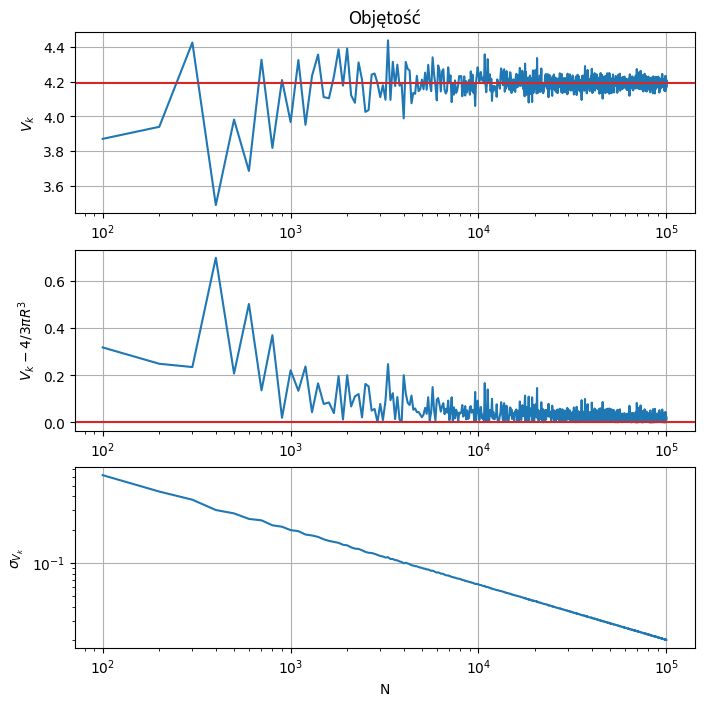

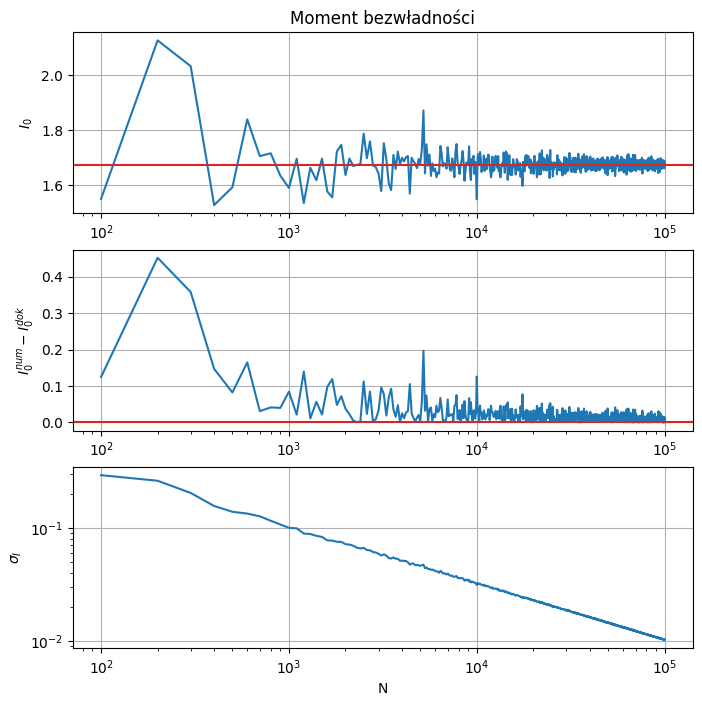

In [215]:
def plot_val_dok_std(title: str, val: np.ndarray, dok: float, std: np.ndarray, title1: str, title2: str, title3: str):
    _, axs = plt.subplots(3, 1, figsize=(8, 8))
    axs[0].set_title(title)

    axs[0].semilogx(N_arr, val)
    axs[0].set_ylabel(title1)
    axs[0].axhline(y=dok, color="tab:red")

    axs[1].semilogx(N_arr, np.abs(val-dok))
    axs[1].set_ylabel(title2)
    axs[1].axhline(y=0, color="tab:red")

    axs[2].loglog(N_arr, std)
    axs[2].set_ylabel(title3)
    axs[2].set_xlabel("N")

    axs[0].grid(True)
    axs[1].grid(True)
    axs[2].grid(True)

    plt.show()

plot_val_dok_std("Objętość", V_arr, Vdok, Vstd_arr, "$V_k$", "$V_k - 4/3\\pi R^3$", "$\\sigma_{V_k}$")
plot_val_dok_std("Moment bezwładności", I_arr, Idok, Istd_arr, "$I_0$", "$I_0^{num} - I_0^{dok}$", "$\\sigma_{I}$")
# plot_val_dok_std(I_arr, Idok, Istd_arr, "$I_S$", "$I_S^{num} - I_S^{dok}$", "$\\sigma_{I_S}$")